<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB43_A03_Deutsch_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Berat Yenilen, Utku Birkan, Arda Çınar, Cenk Tüysüz and Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b> Deutsch's Algorithm </b></font>
<br><br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1QPEgaCZInFFYbMpaFuh_OlVM2Pg_3UX3?usp=sharing#scrollTo=wtMjBt2TFPRm' if in_colab() else 'QB43_A03_Deutsch_Algorithm_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1QPEgaCZInFFYbMpaFuh_OlVM2Pg_3UX3?usp=sharing#scrollTo=ZZgl_ouAFPRn' if in_colab() else 'QB43_A03_Deutsch_Algorithm_Solutions.ipynb#task2')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py"
    !wget --no-cache -O oracle.py {url}

    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

--2025-07-04 15:43:31--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3128 (3.1K) [text/plain]
Saving to: ‘oracle.py’

oracle.py           100%[===================>]   3.05K  --.-KB/s    in 0s      

2025-07-04 15:43:31 (32.6 MB/s) - ‘oracle.py’ saved [3128/3128]



##### In this notebook, we will look at one of the first problems that is solved using quantum computers with an advantage compared to classical computers.

<h2>Deutsch's problem</h2>

Given a boolean function $f:\{0,1\} \rightarrow \{0, 1\}$, we say $f$ is balanced if $f(0) \neq f(1)$ and constant if $f(0) = f(1)$.

Given  $f:\{0,1\} \rightarrow \{0, 1\}$ as an oracle, that is we can evaluate it for an input by making queries but we can't look inside, the problem is to decide whether $f$ is constant or balanced.

<h3>Oracle model of computation </h3>

Suppose that your friend picks such a function $f$ and you try to guess whether it is constant or balanced. You are only allowed to ask questions like "What is $f(0)$?" Each question you ask, is a query to the function $f$. In quantum computing, many algorithms rely on this oracle model of computation and the aim is to solve some problem making as minimum queries as possible.


## Classical solution

Given such a function, we need to evaluate the function *twice* to get an answer using a classical computer.

## Quantum solution

We had previously established that every 'classical' logical function $f$ can be converted to an equivalent unitary operator $U_f$ (by constructing a logical quantum circuit). Now we are going to propose a quantum algorithm that evaluates $U_f$ only *once*.

 <img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch4/deutsch.png" width="40%" align="center">
    </td></tr>

<h2> Algorithm </h2>

We construct a 2 qubit circuit.

- Set the second qubit to state $\ket{-}$ by applying $X$ and $H$ gates.

- Apply $H$ to first qubit.

- Apply $U_f$.

- Apply $H$ to first qubit.

- Measure the first qubit. If it is 0 then $f$ is constant. If it is 1, then $f$ is balanced.


 <img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch4/deutsch_2.png" width="50%" align="center">
    </td></tr>


<h2> Analysis </h2>

    
We start with the initial state $\ket{\psi_0} = \ket{0}\ket{0}$. Next we apply an $X$ gate to the second qubit and obtain the state $\ket{\psi_1} = \ket{0}\ket{1}.$

After applying $H$ to both qubits, the first qubit is in the equal superposition state and the second qubit is now in state $\ket{-}$.

\begin{align*}
\ket{\psi_2} &= \left(\frac{1}{\sqrt{2}}\ket{0} +\frac{1}{\sqrt{2}}\ket{1} \right) \ket{-} \\
&= \frac{1}{\sqrt{2}}\ket{0}\ket{-}  +\frac{1}{\sqrt{2}}\ket{1}\ket{-} \\
\hspace{-2in}\\
\end{align*}

Next we apply $U_f$ to $\ket{\psi_2}$ and obtain $\ket{\psi_3}$

\begin{align*}
\\\ket{\psi_3} &= U_f\left(\frac{1}{\sqrt{2}}\ket{0}\ket{-}+\frac{1}{\sqrt{2}}\ket{1}\ket{-}\right) \\
&= \frac{1}{\sqrt{2}}U_f\ket{0}\ket{-}+\frac{1}{\sqrt{2}}U_f\ket{1}\ket{-} &\mbox{ Linearity of the operator} \\
&= \frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}\ket{-}+\frac{1}{\sqrt{2}}(-1)^{f(1)}\ket{1}\ket{-}  &\mbox{ By phase kickback} \\
&= \left(\frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}+\frac{1}{\sqrt{2}}(-1)^{f(1)}\ket{1}\right)\ket{-} \\
\\
\end{align*}

Let's focus on the first qubit. Now we will move on to vector notation as the analysis will be easier. We can express $\ket{\psi_3}$ using the following vector:

$$\hspace{-3.1in} \ket{\psi_{3,0}} = \frac{1}{\sqrt{2}}\myvector{(-1)^{f(0)} \\ (-1)^{f(1)}} $$

Next, we apply $H$ gate to first qubit and obtain the following state vector:

$$ \hspace{-2.5in}\ket{\psi_{4,0}} =\frac{1}{\sqrt{2}}\hadamard \myvector{(-1)^{f(0)} \\ (-1)^{f(1)}}$$

$$ \hspace{-2in}=\frac{1}{2}\myvector{ (-1)^{f(0)} + (-1)^{f(1)} \\ (-1)^{f(0)} - (-1)^{f(1)} } $$

Now let's consider the two cases.

- $f$ is constant:

In this case $ f(0) = f(1) $ and $\ket{\psi_{4,0}}= \myvector{ (-1)^{f(0)} \\ 0 } $ and the corresponding quantum state is $\ket{\psi_{4,0}}=(-1)^{f(0)} \ket{0}$. Hence, we observe 0 with probability 1. (Since $f(0)=f(1)$, you can equivalently replace it.)

- $f$ is balanced:

In this case, $ f(0) \neq f(1) $ and $\ket{\psi_{4,0}}= \myvector{ 0 \\ (-1)^{f(0)} } $ and the corresponding quantum state is $\ket{\psi_{4,0}}=(-1)^{f(0)} \ket{1}$. Hence, we observe 1 with probability 1.

So, we can find (with 100% certainty) whether $f$ is constant or balanced by making only a single query to function $f$.


_Note: Alternatively, we could analyze the state $\left(\frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}+\frac{1}{\sqrt{2}}(-1)^{f(1)}\ket{1}\right)\ket{-}$ for each possible $f$ and then apply $H$ to see its effect. For instance, if $f(0)=f(1)$, then $\ket{\psi_3}$ reduces to $\ket{+}\ket{-}$ so that after applying $H$, you obtain $\ket{0}$._

<h3> Task 1 </h3>

You are given an oracle function called `oracle()`, which returns randomly a quantum circuit with 2 qubits corresponding to an either constant or a balanced function $f$. This circuit represents the operator $U_f$ in our algorithm. Note that qubit 0 is the input and qubit 1 is the output qubit.

Implement the proposed algorithm to decide whether or not your oracle function is constant or even.

(Note: You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit?)

<h5>Qiskit notes:</h5>

- Run the following cell to load oracle function. `oracle()` returns a quantum circuit implementing $U_f$.
- You can use `circuit.compose(oracle(), inplace=True)` to add the oracle to your whole circuit. (In general, you can define functions returning circuits and append them to your circuit by `compose` method.)
- Barriers are not quantum programming primitives but they instruct qiskit to not apply any optimizations across the barrier and also useful for visualization. You may add them to your circuit using `circuit.barrier()`.


In [2]:
quantum_file = path_files+"oracle.py"
%run $quantum_file

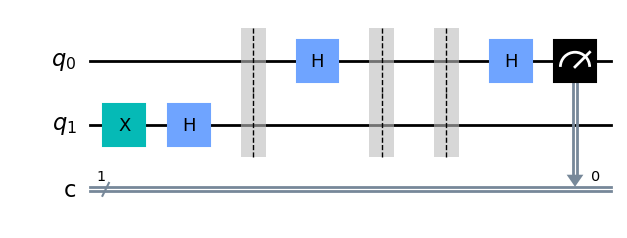

In [9]:
from qiskit import QuantumCircuit, execute, Aer

circuit = QuantumCircuit(2, 1)

# Your code here
# Apply X and H to qubit 1
circuit.x(1)
circuit.h(1)
circuit.barrier()
# Apply H to  qubit 0
circuit.h(0)
# Apply oracle
circuit.compose(oracle(), inplace = True)
# Apply H to qubit 0
circuit.h(0)
# Measure the qubit 0
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [10]:
job = execute(circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'0': 10000}


To check out our solution, run the next cell:

In [8]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

<h3> Task 2 </h3>

There are four possible functions $f(x)$. Could you identify what these are?

Write down the `oracle()` function which implements each. That is, you should construct a circuit implementing $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $.

Note that qubit 0 is the input and qubit 1 is the output qubit. One of the functions is implemented for you to give you an idea.

In [ ]:
import random
from qiskit import QuantumCircuit, execute, Aer

# f(0) = f(1) = 0
def oracle1():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    #do something
    circuit.barrier()

    return circuit

# f(0)=f(1)=1
def oracle2():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    circuit.x(1)
    circuit.barrier()

    return circuit

# f(0) = 0, f(1) = 1
def oracle3():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    #do something
    circuit.cx(0, 1)
    circuit.barrier()

    return circuit

# f(0) = 1, f(1) = 0
def oracle4():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    #do something
    circuit.x(0)
    circuit.cx(0, 1)
    circuit.x(0)
    circuit.barrier()

    return circuit

To check out our solution, run the next cell:

In [ ]:
SolutionToTask2()  # show solution for task 2

Deutsch's algorithm proves that you can solve the same problem by making only 1 query instead of 2, without making any errors. This is one of the first results where we gain advantage using quantum computing but yet it is not an enough speedup. Next, we will see some algorithms where this gap is greater.